In [1]:
import requests
import datetime


data_inicio = datetime.date(2021,1,1)
data_fim = datetime.date(2021,6,30)
lista_data =  [data_inicio + datetime.timedelta(days=idx) for idx in range((data_fim-data_inicio).days+1)]
for i in lista_data:
        url = f'https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/{i.strftime("%Y")}/wi_h2_mfi_{i.strftime("%Y%m%d")}_v05.cdf'
        r = requests.get(url, allow_redirects=False)

        open(f'pasta_dados//wi_h2_mfi_{i}_v05.cdf', 'wb').write(r.content)

In [ ]:
import requests
import datetime

data_inicio = datetime.date(2021,1,1)
data_fim = datetime.date(2021,6,30)
lista_data =  [data_inicio + datetime.timedelta(days=idx) for idx in range((data_fim-data_inicio).days+1)]
for i in lista_data:
        url = f'https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/{i.strftime("%Y")}/wi_h1_swe_{i.strftime("%Y%m%d")}_v01.cdf'
        r = requests.get(url, allow_redirects=False)

        open(f'pasta_dados//swe//wi_h1_swe_{i.strftime("%Y%m%d")}_v01.cdf', 'wb').write(r.content)

In [3]:
import requests
import datetime

data_inicio = datetime.date(2021,1,1)
data_fim = datetime.date(2021,6,30)
lista_data =  [data_inicio + datetime.timedelta(days=idx) for idx in range((data_fim-data_inicio).days+1)]
for i in lista_data:
        url = f'https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/{i.strftime("%Y")}/dscovr_h0_mag_{i.strftime("%Y%m%d")}_v01.cdf'
        r = requests.get(url, allow_redirects=False)

        open(f'pasta_dados//dscovr///dscovr_h0_mag_{i}_v01.cdf', 'wb').write(r.content)

In [171]:
import cdflib
cdf_file = cdflib.CDF("pasta_dados/swe/wi_h1_swe_20210101_v01.cdf")
cdf_file.cdf_info()
# cdf_file.varget("BX")

{'CDF': PosixPath('/home/guilherme.dariani/work/pasta_dados/swe/wi_h1_swe_20210101_v01.cdf'),
 'Version': '3.7.1',
 'Encoding': 1,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['fit_flag',
  'Epoch',
  'year',
  'doy',
  'Proton_V_nonlin',
  'Proton_sigmaV_nonlin',
  'Proton_VX_nonlin',
  'Proton_sigmaVX_nonlin',
  'Proton_VY_nonlin',
  'Proton_sigmaVY_nonlin',
  'Proton_VZ_nonlin',
  'Proton_sigmaVZ_nonlin',
  'Proton_W_nonlin',
  'Proton_sigmaW_nonlin',
  'Proton_Wperp_nonlin',
  'Proton_sigmaWperp_nonlin',
  'Proton_Wpar_nonlin',
  'Proton_sigmaWpar_nonlin',
  'EW_flowangle',
  'SigmaEW_flowangle',
  'NS_flowangle',
  'SigmaNS_flowangle',
  'Proton_Np_nonlin',
  'Proton_sigmaNp_nonlin',
  'Alpha_V_nonlin',
  'Alpha_sigmaV_nonlin',
  'Alpha_VX_nonlin',
  'Alpha_sigmaVX_nonlin',
  'Alpha_VY_nonlin',
  'Alpha_sigmaVY_nonlin',
  'Alpha_VZ_nonlin',
  'Alpha_sigmaVZ_nonlin',
  'Alpha_W_nonlin',
  'Alpha_sigmaW_nonlin',
  'Alpha_Wperp_nonlin',
  'Alpha_sigmaWperp_nonlin',
  

In [100]:
import datetime
data_inicio = datetime.date(2021,1,1)
data_fim = datetime.date(2021,6,30)
lista_data =  [data_inicio + datetime.timedelta(days=idx) for idx in range((data_fim-data_inicio).days+1)]
dados_totais_dscovr = np.array([])
for i in lista_data:
    cdf_file = cdflib.CDF("pasta_dados/dscovr/dscovr_h0_mag_"+str(i.strftime("%Y-%m-%d"))+"_v01.cdf")
    lista = cdf_file.varget("B1F1")
    dados_totais_dscovr = np.concatenate([dados_totais_dscovr,lista])

In [169]:
data_inicio = datetime.date(2021,1,1)
data_fim = datetime.date(2021,6,30)
lista_data =  [data_inicio + datetime.timedelta(days=idx) for idx in range((data_fim-data_inicio).days+1)]
dados_totais_wind = np.array([])
for i in lista_data:
    cdf_file = cdflib.CDF(f"pasta_dados/wi_h2_mfi_{i}_v05.cdf")
    lista = cdf_file.varget("BF1")
    dados_totais_wind = np.concatenate([dados_totais_wind,lista])
dados_totais_wind = np.delete(dados_totais_wind,np.s_[-6:])
dados_totais_wind_media = np.average(dados_totais_wind.reshape(-1, 10), axis=1)
diferencia = len(dados_totais_dscovr)-len(dados_totais_wind_media)
dados_prontos_wind = np.delete(dados_totais_wind_media,np.s_[diferencia:])


In [172]:
data_inicio = datetime.date(2021,1,1)
data_fim = datetime.date(2021,6,30)
lista_data =  [data_inicio + datetime.timedelta(days=idx) for idx in range((data_fim-data_inicio).days+1)]
dados_Proton_V_moment = np.array([])
dados_Proton_W_moment = np.array([])
dados_Proton_Np_moment = np.array([])
for i in lista_data:
    cdf_file = cdflib.CDF("pasta_dados//swe//wi_h1_swe_"+str(i.strftime("%Y%m%d"))+"_v01.cdf")
    lista_1 = cdf_file.varget("Proton_V_moment")
    lista_2 = cdf_file.varget("Proton_W_moment")
    lista_3 = cdf_file.varget("Proton_Np_moment")
    
    dados_Proton_V_moment = np.concatenate([dados_Proton_V_moment,lista_1])
    dados_Proton_W_moment = np.concatenate([dados_Proton_W_moment,lista_2])
    dados_Proton_Np_moment = np.concatenate([dados_Proton_Np_moment,lista_3])

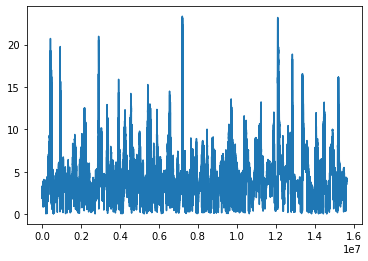

In [186]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
y = np.delete(dados_prontos_wind,np.where(lista == -1e31))
plt.plot(y)
plt.show()

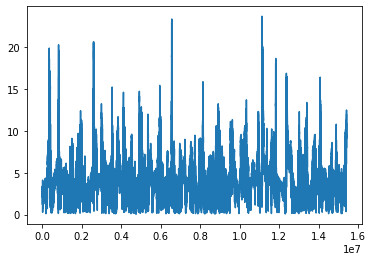

In [196]:
y = np.delete(dados_totais_dscovr,np.where(dados_totais_dscovr < -8))
plt.plot(y)
plt.show()

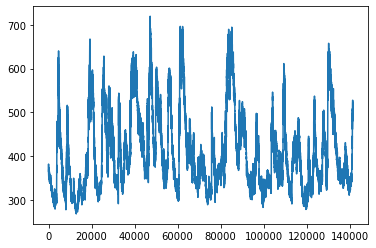

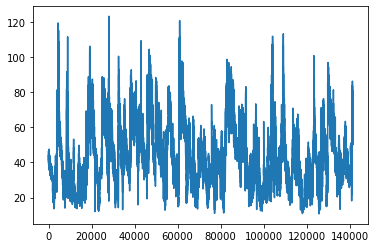

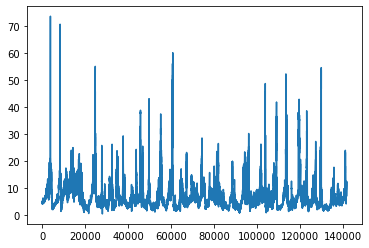

In [210]:
for i in [dados_Proton_V_moment, dados_Proton_W_moment, dados_Proton_Np_moment]:
    y = np.delete(i,np.where(i > 10000))
    plt.plot(y)
    plt.show()